In [1]:
using Scical
using PyPlot

In [2]:
read_csv_data(file::AbstractString) = begin
    csv = readcsv(file)
    local row
    for row in 1:(size(csv)[1])
        if isa(csv[row][1], Number)
            break
        end
    end
    return Array{Float64}(csv[row:end, :])
end

read_csv_data (generic function with 1 method)

In [3]:
const data1 = read_csv_data("srs_average/full.csv")

125000x2 Array{Float64,2}:
 -0.01108     0.471031
 -0.0110798   0.470953
 -0.0110797   0.470797
 -0.0110795   0.470719
 -0.0110794   0.470547
 -0.0110792   0.470703
 -0.011079    0.470828
 -0.0110789   0.471391
 -0.0110787   0.471031
 -0.0110786   0.471219
 -0.0110784   0.471719
 -0.0110782   0.472   
 -0.0110781   0.472406
  ⋮                   
  0.00891808  0.384188
  0.00891824  0.38425 
  0.0089184   0.384328
  0.00891856  0.384125
  0.00891872  0.384375
  0.00891888  0.384344
  0.00891904  0.384328
  0.0089192   0.384359
  0.00891936  0.384344
  0.00891952  0.384078
  0.00891968  0.384594
  0.00891984  0.384672

In [4]:
t1 = data1[:, 1]
v1 = data1[:, 2]

125000-element Array{Float64,1}:
 0.471031
 0.470953
 0.470797
 0.470719
 0.470547
 0.470703
 0.470828
 0.471391
 0.471031
 0.471219
 0.471719
 0.472   
 0.472406
 ⋮       
 0.384188
 0.38425 
 0.384328
 0.384125
 0.384375
 0.384344
 0.384328
 0.384359
 0.384344
 0.384078
 0.384594
 0.384672

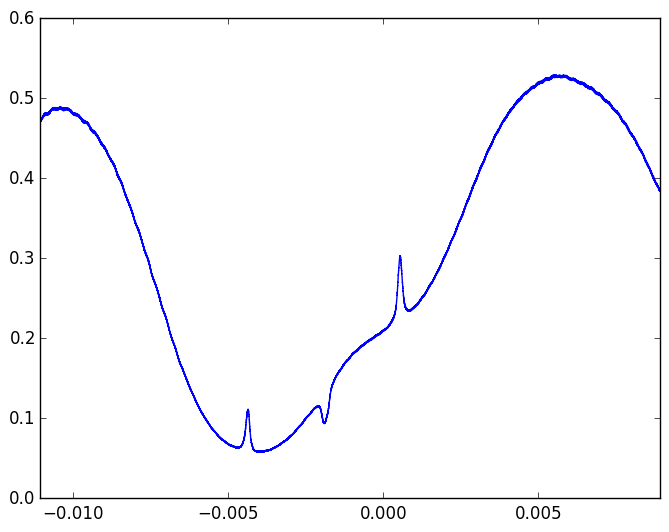

(-0.01108,0.00891984)

In [5]:
plot(t1, v1)
xlim(minimum(t1), maximum(t1))

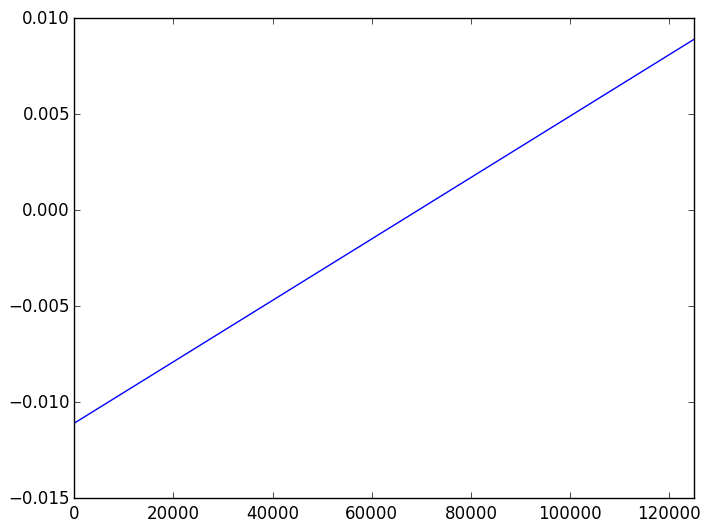

(0,125000)

In [6]:
plot(t1)
xlim(0, length(t1))

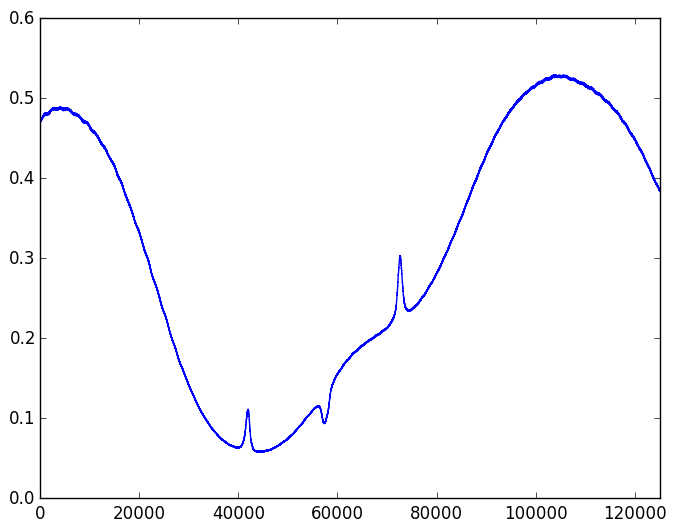

(0,125000)

In [7]:
plot(v1)
xlim(0, length(v1))

In [8]:
find_sub_max{T}(ary::Vector{T}, start::Int=1, _end::Int=0) = begin
    _end = _end == 0 ? endof(ary) : _end
    (ele, idx) = findmax(sub(ary, start:_end))
    return (ele, idx + start - 1)
end

find_sub_max (generic function with 3 methods)

In [9]:
vpeak1, ipeak1 = find_sub_max(v1, 40000, 48000)

(0.111344,41970)

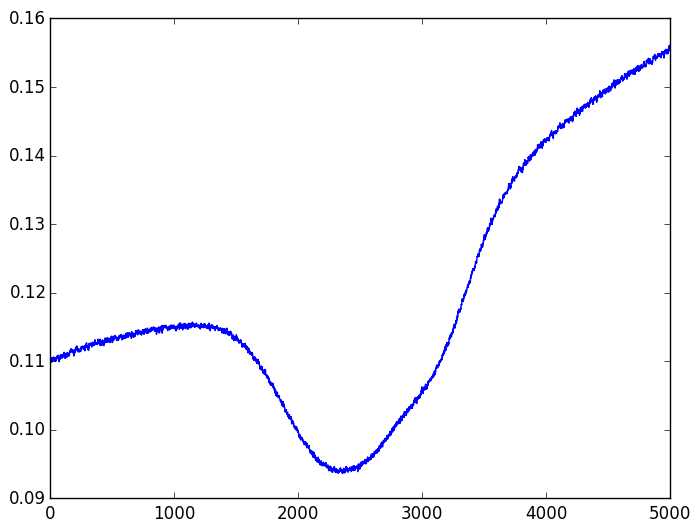

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbc746160>

In [10]:
plot(v1[55000:60000])

In [11]:
vpeak2, ipeak2 = find_sub_max(-v1, 55000, 60000)

(-0.0936563,57355)

In [12]:
vpeak2 = -vpeak2

0.0936563

In [13]:
vpeak3, ipeak3 = find_sub_max(v1, 70000, 80000)

(0.303156,72619)

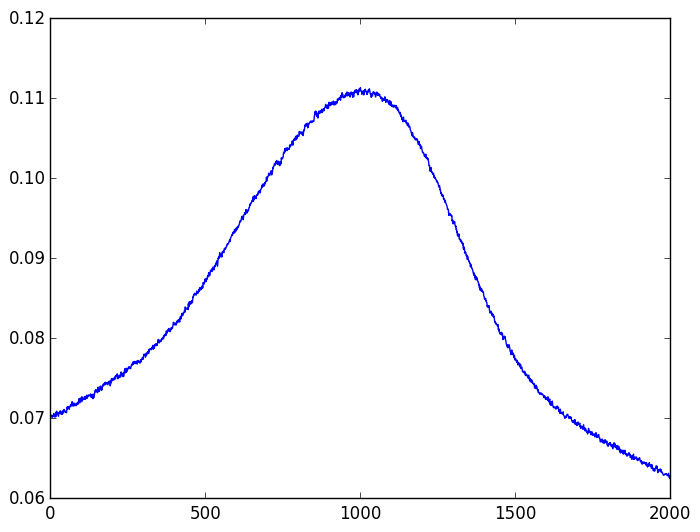

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbc6e9f60>

In [14]:
# Around peak 1
plot(v1[ipeak1 - 1000:ipeak1 + 1000])

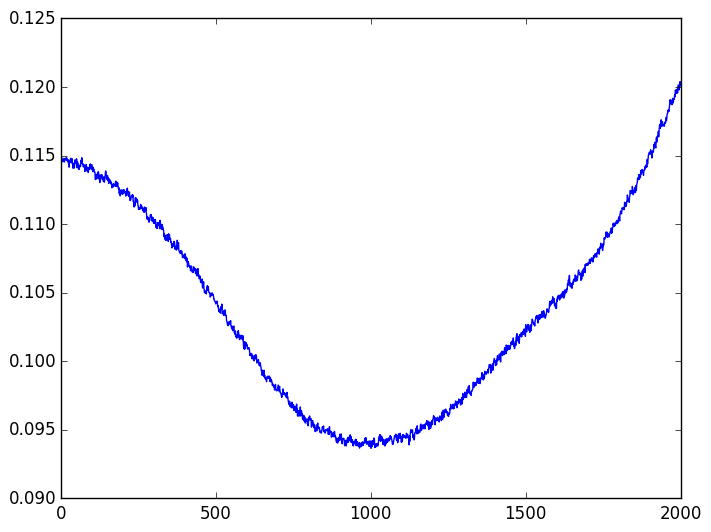

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbc649be0>

In [15]:
# Around peak 2
plot(v1[ipeak2 - 1000:ipeak2 + 1000])

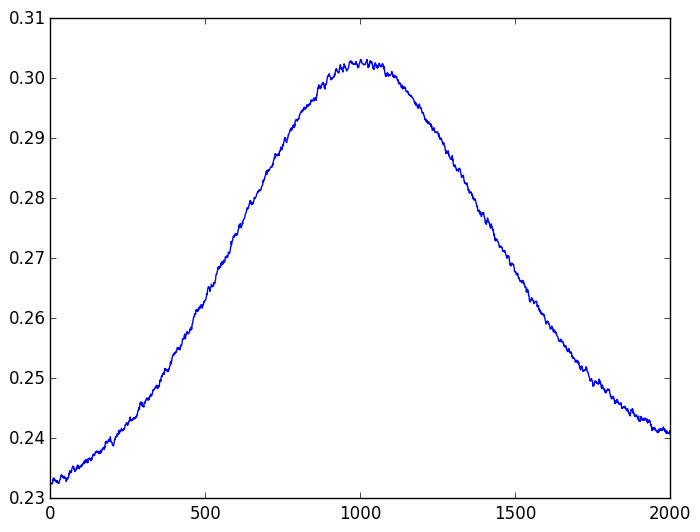

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbc62ed30>

In [16]:
# Around peak 3
plot(v1[ipeak3 - 1000:ipeak3 + 1000])

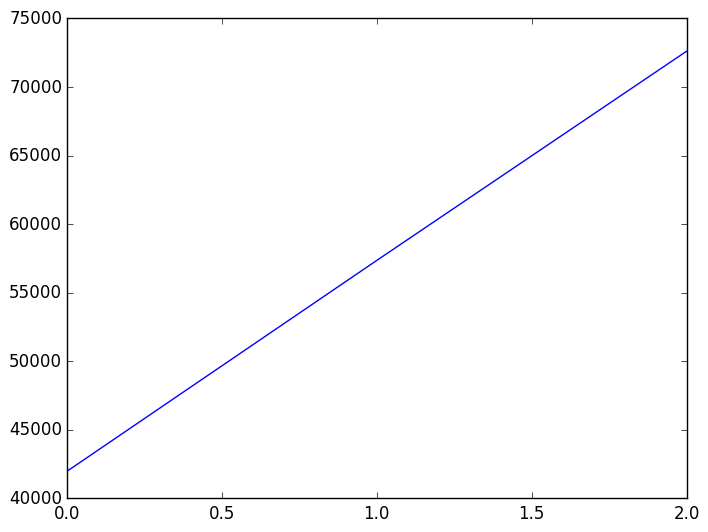

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbc587e10>

In [17]:
plot([ipeak1, ipeak2, ipeak3])

In [18]:
idxs = [1:ipeak1 - 2000; ipeak1 + 2000:ipeak2 - 2000; ipeak2 + 2000:ipeak3 - 2000;
    ipeak3 + 2000:endof(v1)]

113003-element Array{Int64,1}:
      1
      2
      3
      4
      5
      6
      7
      8
      9
     10
     11
     12
     13
      ⋮
 124989
 124990
 124991
 124992
 124993
 124994
 124995
 124996
 124997
 124998
 124999
 125000

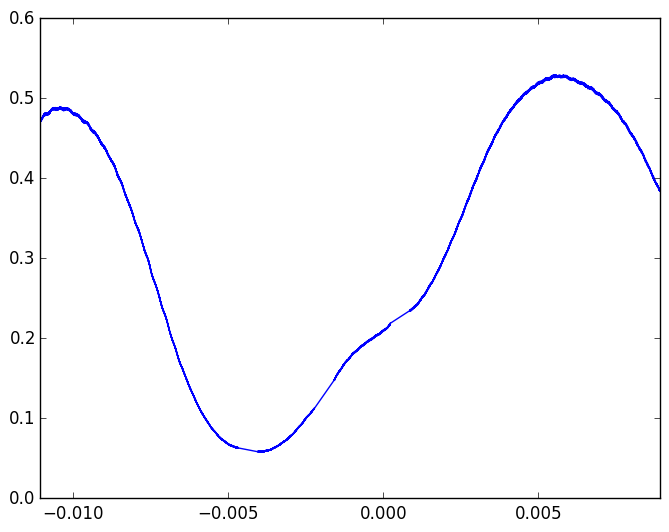

(-0.01108,0.00891984)

In [19]:
plot(t1[idxs], v1[idxs])
xlim(minimum(t1), maximum(t1))

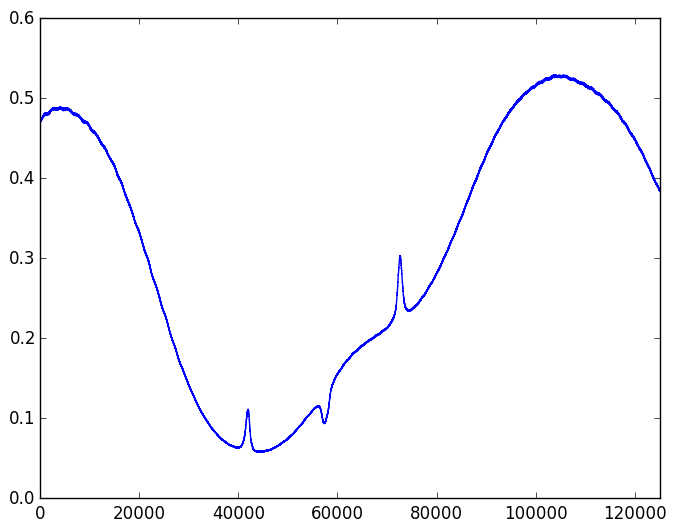

(0,125000)

In [20]:
plot(v1)
xlim(0, length(v1))

In [21]:
vmax1, imax1 = find_sub_max(v1, 1, 10000)

(0.489703,4106)

In [22]:
vmin1, imin1 = find_sub_max(-v1, 30000, 50000)

(-0.0579063,44490)

In [35]:
vmin1 = -vmin1

0.0579063

In [36]:
vmid = (vmin1 + vmax1) / 2

0.27380465

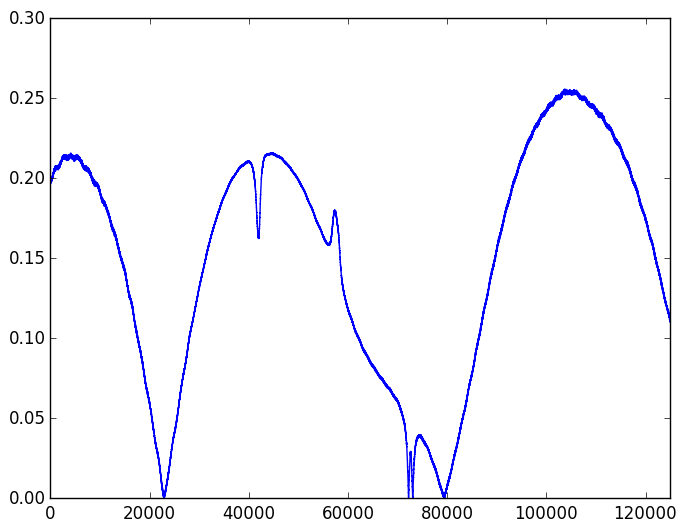

(0,125000)

In [37]:
plot(abs(v1 - vmid))
xlim(0, length(v1))

In [38]:
(_vmid, imid) = find_sub_max(-abs(v1 - vmid), 20000, 30000)

(-7.64999999997018e-6,22890)

In [39]:
hwhm = ipeak1 - imid

19080

In [40]:
hf = ipeak3 - ipeak1

30649

In [41]:
f_hwhm = hwhm / hf * 1771.626MHz

1.102894844203726e9

In [29]:
# Sodium mass
m_Na = Scical.at_m.Na * 1e-3 / N_A

3.817540787057821e-26

In [30]:
# Sodium D2 line wavelength
λ_Na = 589.158nm

5.89158e-7

In [31]:
# Frequency and angular frequency of the transition
f_Na = c / λ_Na
ω_Na = 2π * f_Na

3.1971925481939535e15

In [42]:
T_Na = (f_hwhm / f_Na)^2 * m_Na * c^2 / 2 / k_B / log(2)

842.1254273343458

In [43]:
T_Na - 273.16

568.9654273343458

In [44]:
f_hwhm_200 = √(2 * k_B * (273.16 + 200) * log(2) / m_Na / c^2) * f_Na

8.267034074610523e8